## Integer Programming

In [3]:
from pulp import LpMinimize, LpProblem, lpSum, LpVariable, GLPK

#### Facility Location

Consider a set of demands $I$ and a set of locations $J$. Distance (or traveling time) between demand $i$ and location $j$ is $d_{ij}, i\in I, j \in J$.  
A service level $s>0$ is given: Demand $i$ is said to be "covered" by location $j$ if $d_{ij} < s$.

Define $a_{ij} = 1$ if $d_{ij} < s$ or $0$ otherwise, $i \in I$ --> whether demand i can be covered by location j.  
Decision variable $x_j=1$ if a facility is built at location $i \in J$.  

Problem:  minimize the total number of facilities.For all the facilities, we check if the demand is covered and at least one facility  has  to be built. 
$\begin{align}
\min \sum_{j\in J} x_j\\
s.t. \sum_{j \in J} a_{ij}x_{j} ≥ 1, \forall i\in I\\
x_j \in \{0, 1\}, \forall j \ in J
\end{align}$  

Suppose we are restricted to build at most $p \in \mathbb{N}$ facilities. Let $y_i=1$ if demand $i\in I$ is covered by any facility or 0 otherwise. Now in our problem, we want to maximize the demand we can cover given that the number of facilities is no greater than p. We also check if the customer is covered by any nearby facility ($\sum_{j \in J} a_{ij}x_{j}$). Now the formulation is: 

$\begin{align}
\min \sum_{i\in I} y_i\\
s.t.
\sum_{j \in J} a_{ij}x_{j} ≥ y_i, \forall i\in I\\
\sum_{i\in J}x_j ≤ p\\
x_j \in \{0,1\}, \forall j \ in J \\
y_i \in \{0,1\}, \forall i \ in I \\
\end{align}$ 


__Fixed Charge Location Problems__  
At demand $i$, the demand size (or the amount of service required) is $h_i>0$.  
The unit shipping cost from location $j$ to demand $i$ is $d_{ij}>0.$  
The fixed construction cost at location $j$ is $f_{j} > 0$.  
How to allocate facilities to minimize total costs?  

We define:  
$x_j = 1$ if a facility is built at location $j\in J$.  
$y_{ij}=1$ if demand $i\in I$ is served by facility at location $j$.  
$h_i$ is the number of times we need to travel to customers.  
$\sum_{j\in J}y_{ij} = 1$: For each customer or demand $i$ there must one facility serving it. 


The formulation is:  
$\begin{align}
\min \sum_{i\in I}\sum_{j \in J} h_id_{ij}y_{ij} + \sum_{j\in J}f_jx_j\\
s.t.
y_{ij} ≤ x_j, \forall i\in I, j\in J\\
\sum_{j\in J}y_{ij} = 1\\
x_j \in \{0,1\}, \forall j \ in J \\
y_i \in \{0,1\}, \forall i \ in I \\
\end{align}$ 

The is the __uncapacitated__ version (a facility can serve any amount of demand). If a facility at location $j$ has a limited capacity $K_j>0$, we may add the capacity constraint $\sum_{i\in I} h_iy_{ij}≤K_j, \forall j \in J$. 

__Example__  
$f_i = $weekly operating cost of distribution center $j$  
$c_{ij} = $shipping cost per book from distribution center $j$ to region $i$  
$K_{j} = $capacity of distribution center $j$  
$D_i$ = book demand of region i 

The decision variables are  
$x_{j}$ if a distribution center is built at location $j$  
$y_{ij}$ the number of books shipped from distribution center $j$ to region $i$  

Formulation  
$\begin{align}
\min \sum_{i=1}^{5}\sum_{j=1}^{5} c_{ij}y_{ij} + \sum_{j=1}^{5}f_jx_j \\
s.t. \sum_{i=1}^{5} y_{ij} ≤ K_j x_j, \forall j = 1,...,5 \\
\sum_{j=1}^{5} y_{ij} ≥ D_i \\
x_j \in \{0,1\}, \forall j = 1,...,5 \\
y_{ij}≥0, \forall i = 1,...,5, \forall j=1,...,5 \\
\end{align}$

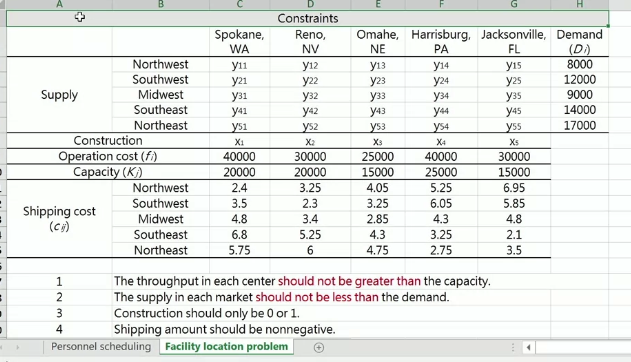

In [4]:
model = LpProblem(name="facility_location", sense=LpMinimize)

# Decision Variables
x = []
for j in range(1, 6):
    x.append(LpVariable(name=f"x_{j}", lowBound=0, cat="Binary"))

y = []
for i in range(1, 6):
    y_i = []
    for j in range(1, 6):
        y_i.append(LpVariable(name=f"y_{i}{j}", lowBound=0))
    y.append(y_i)

operation_costs = [4e4, 3e4, 2.5e4, 4e4, 3e4]
capacities = [2e4, 2e4, 1.5e4, 2.5e4, 1.5e4]
shipping_costs = [
    [2.4, 3.25, 4.05, 5.25, 6.95],
    [3.5, 2.3, 3.25, 6.05, 5.85],
    [4.8, 3.4, 2.85, 4.3, 4.8],
    [6.8, 5.25, 4.3, 3.25, 2.1],
    [5.75, 6, 4.75, 2.75, 3.5],
]
demands = [8000, 12000, 9000, 14000, 17000]

obj_operation_costs = [c * x for c, x in zip(operation_costs, x)]
obj_shipping_costs = []
for i in range(5):
    for j in range(5):
        obj_shipping_costs.append(shipping_costs[i][j] * y[i][j])
obj_func = lpSum(obj_operation_costs + obj_shipping_costs)

model += obj_func

# capacity constraint
for j in range(5):
    model += (lpSum([y[i][j] for i in range(5)]) <= capacities[j] * x[j], f"capacity constraint for facility {j + 1}")
    
# demand constraints
for i in range(5):
    model += (lpSum([y[i][j] for j in range(5)]) >= demands[i], f"demand constraint for region {i + 1}")
    
model

facility_location:
MINIMIZE
40000.0*x_1 + 30000.0*x_2 + 25000.0*x_3 + 40000.0*x_4 + 30000.0*x_5 + 2.4*y_11 + 3.25*y_12 + 4.05*y_13 + 5.25*y_14 + 6.95*y_15 + 3.5*y_21 + 2.3*y_22 + 3.25*y_23 + 6.05*y_24 + 5.85*y_25 + 4.8*y_31 + 3.4*y_32 + 2.85*y_33 + 4.3*y_34 + 4.8*y_35 + 6.8*y_41 + 5.25*y_42 + 4.3*y_43 + 3.25*y_44 + 2.1*y_45 + 5.75*y_51 + 6*y_52 + 4.75*y_53 + 2.75*y_54 + 3.5*y_55 + 0.0
SUBJECT TO
capacity_constraint_for_facility_1: - 20000 x_1 + y_11 + y_21 + y_31 + y_41
 + y_51 <= 0

capacity_constraint_for_facility_2: - 20000 x_2 + y_12 + y_22 + y_32 + y_42
 + y_52 <= 0

capacity_constraint_for_facility_3: - 15000 x_3 + y_13 + y_23 + y_33 + y_43
 + y_53 <= 0

capacity_constraint_for_facility_4: - 25000 x_4 + y_14 + y_24 + y_34 + y_44
 + y_54 <= 0

capacity_constraint_for_facility_5: - 15000 x_5 + y_15 + y_25 + y_35 + y_45
 + y_55 <= 0

demand_constraint_for_region_1: y_11 + y_12 + y_13 + y_14 + y_15 >= 8000

demand_constraint_for_region_2: y_21 + y_22 + y_23 + y_24 + y_25 >= 12000

de

In [5]:
status = model.solve()
if status == 1:
    print(model.objective.value())
    for var in model.variables():
        print(var.name, "=", var.value())

268950.0
x_1 = 0.0
x_2 = 1.0
x_3 = 0.0
x_4 = 1.0
x_5 = 1.0
y_11 = 0.0
y_12 = 8000.0
y_13 = 0.0
y_14 = 0.0
y_15 = 0.0
y_21 = 0.0
y_22 = 12000.0
y_23 = 0.0
y_24 = 0.0
y_25 = 0.0
y_31 = 0.0
y_32 = 0.0
y_33 = 0.0
y_34 = 8000.0
y_35 = 1000.0
y_41 = 0.0
y_42 = 0.0
y_43 = 0.0
y_44 = 0.0
y_45 = 14000.0
y_51 = 0.0
y_52 = 0.0
y_53 = 0.0
y_54 = 17000.0
y_55 = 0.0


#### Machine Scheduling Problems

Job $j\in J={1,2,..,n}$ has __processing time__ $p_j$.  
Different schedules give these jobs different __completion times__. The completion time of job j is denoted as $x_j$.  
The machine only process one job at a time.  
We aim to minimize the total completion time $\sum_{j \in J}x_j$. Then $x_n = \sum_{i=1}^{n}p_i$.  
In a feasible schedule, job $i$ is either before or after job $j$ for all $j ≠ i$. We need to satisfy either $x_j≥x_i+p_j$ ($x_j$ is after $x_i$) or $x_i≥x_j+p_i$.  
Let $z_{ij}=1$ if job $j$ is before $i$ for $i<j$. The constraints will be:  
$\begin{align}
x_i + p_j - x_j ≤ Mz_{ij}\\
x_j + p_i - x_i ≤ M(1-z_{ij})
\end{align}$ 

__Minimizing makespan on parallel machines__  
Consider scheduling $n$ jobs on $m$ parallel machines. As long as some jobs are assigned to a machine, the sequence on that machine does not matter. The problem of minimizing makespan is just to assign jobs to machines.  
$x_ij=1$ if job $j \in J$ is assigned to machine $i \in I$.  
On machine $i \in I$, the last job is completed at $\sum_{j\in J}p_jx_{ij}$ (completion time for machine $i$).  
The makespan $w$ is the maximum completion time among all machines. We have $w≥\sum_{j\in J}p_jx_{ij}, \forall i \in I$.

The formulation is:  
$\begin{align}
\min w\\
s.t.
w ≥ \sum_{j\in J}p_jx_{ij}, \forall i \in I\\
\sum_{i\in I}x_{ij} = 1, \forall j \in J\\
x_{ij} \in {0,1}, \forall j \in J, \forall i \in I
\end{align}$ 

#### Vehicle Routing Problems  / Traveling Salesperson Problem

Deliver / collect items to/from customers in the most efficient way. __Routing__ problem: to choose a route starting from the original point, passing each address exactly once and then returning to the starting point. 
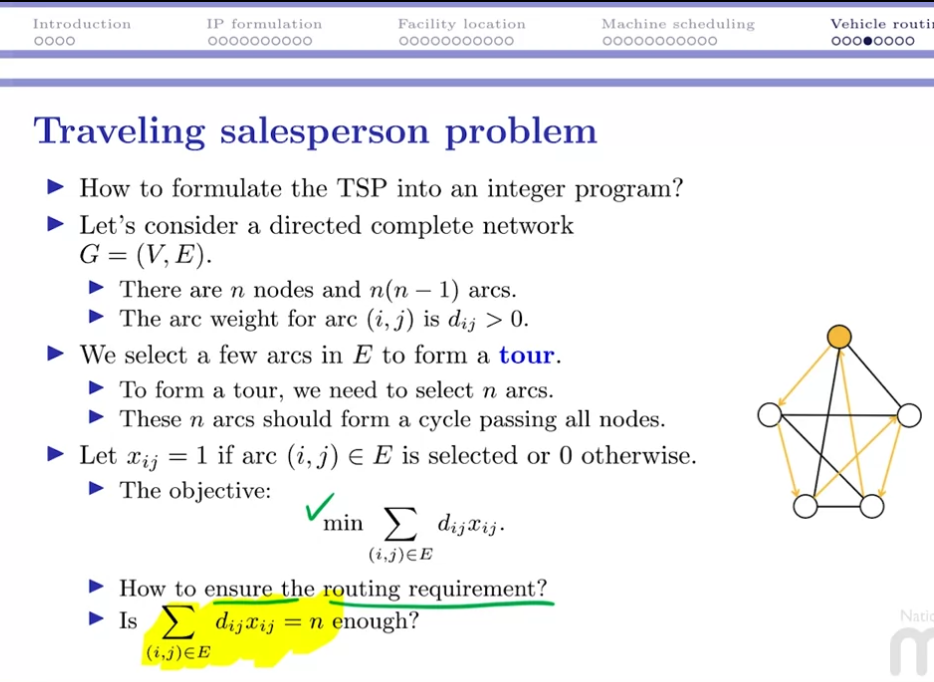



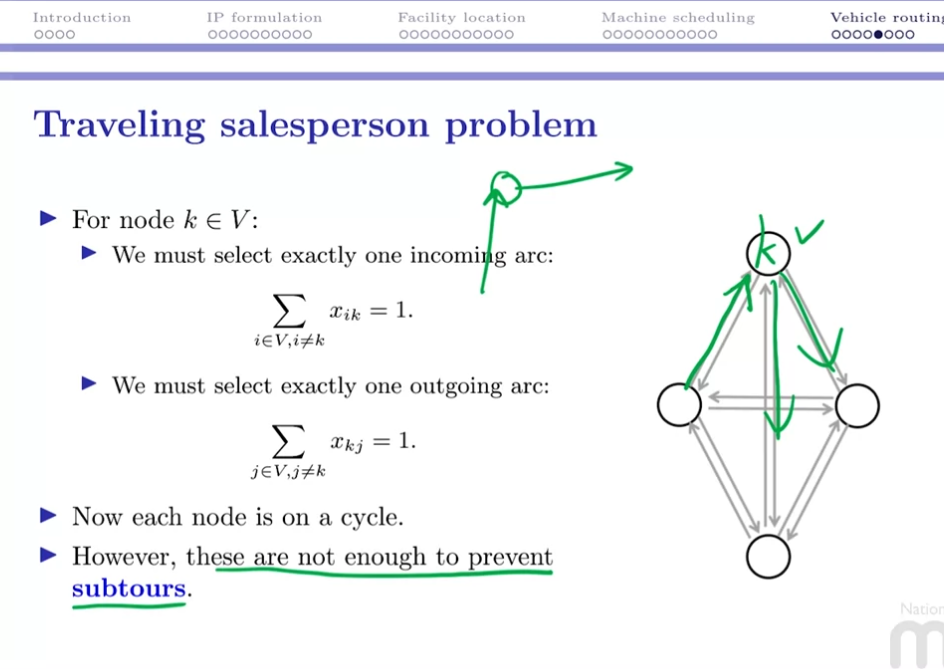